In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset-SA.csv")
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [131]:
df.shape

(205052, 6)

In [132]:
df.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

In [133]:
df.dtypes

,0
product_name,object
product_price,object
Rate,object
Review,object
Summary,object
Sentiment,object


In [134]:
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,24664
Summary,11
Sentiment,0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [136]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


In [137]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180379 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   180379 non-null  object
 1   product_price  180379 non-null  object
 2   Rate           180379 non-null  object
 3   Review         180379 non-null  object
 4   Summary        180379 non-null  object
 5   Sentiment      180379 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [138]:
# Distribution of sentiment labels
ValueCounter = df['Sentiment'].value_counts()
ValueCounter


,count
Sentiment,
positive,147171
negative,24401
neutral,8807


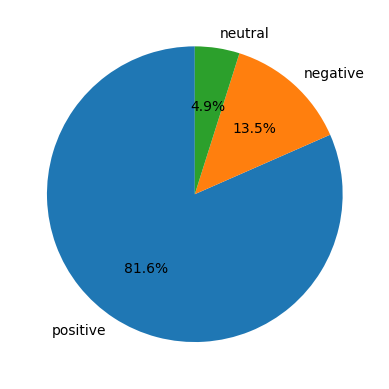

In [139]:
# Visualize sentiment distribution
plt.pie(ValueCounter, labels=ValueCounter.index, autopct='%1.1f%%', startangle=90)
plt.show()

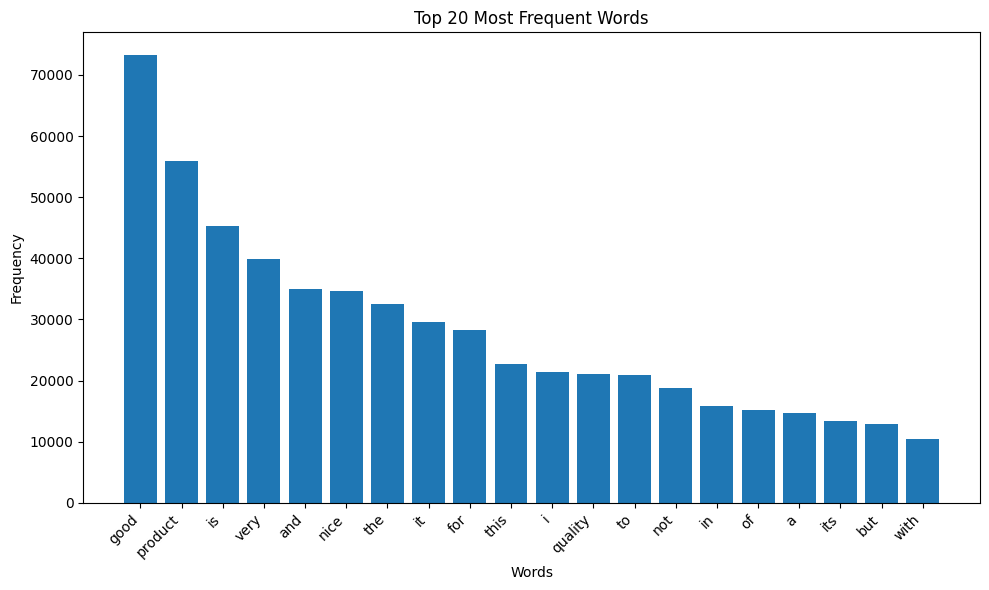

In [140]:
# Word frequencies
all_words = ' '.join(df['Summary']).split()
word_counts = Counter(all_words)
wordscount = word_counts.most_common(20)
words = [word[0] for word in wordscount]
count = [word[1] for word in wordscount]
plt.figure(figsize=(10, 6))
plt.bar(words, count)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.tight_layout()
plt.show()

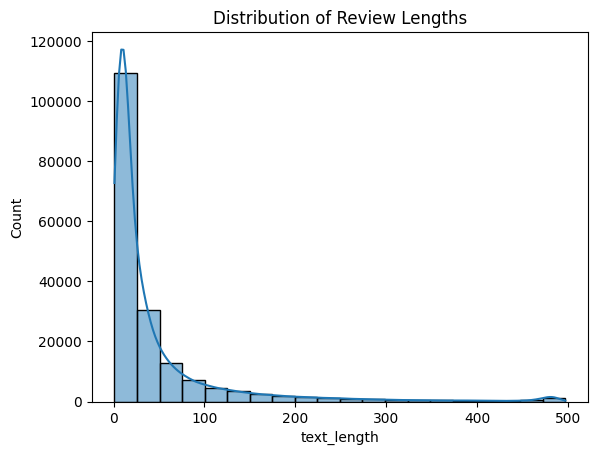

In [147]:
# Analyze text length
df['text_length'] = df['Summary'].apply(len)
sns.histplot(df['text_length'], bins=20, kde=True)
plt.title('Distribution of Review Lengths')
plt.show()

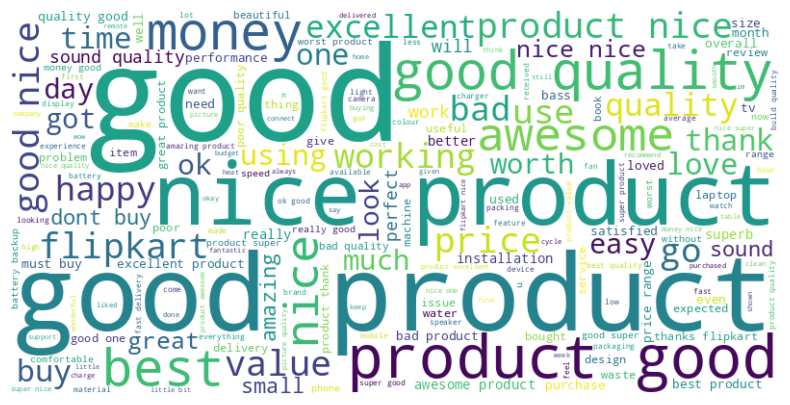

In [142]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Summary']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [143]:
df['product_name'] = df['product_name'].apply(lambda x: re.sub(r'(#|@)\w*', '', x))  # Remove hashtags
df['product_name'] = df['product_name'].apply(lambda x: re.sub("https?:\/\/\S+", '', x))  # Remove links
df['product_name'] = df['product_name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))  # Remove special characters

In [144]:
# Top 10 most reviewed products
top_products = df['product_name'].value_counts().nlargest(10).index
product_sentiment = df[df['product_name'].isin(top_products)].groupby('product_name')['Sentiment'].value_counts().unstack(fill_value=0)
product_sentiment

Sentiment,negative,neutral,positive
product_name,,,
HAIR CARE Triple Blend Damage Repair NonSticky Hair Oil with Aloe Vera For Dry Rough Frizzy Hair Hair Oil 400 ml,42,112,1844
Home Sizzler 153 cm 502 ft Polyester Room Darkening Window Curtain Pack Of 2Floral Brown,75,97,1840
Lakm Eyeconic Kajal Twin PackDeep Black 07 g,220,203,6575
Mi 3i 10000 mAh Power Bank Fast Charging 18W Blue Lithium Polymer,249,41,1716
Mi 5A 80 cm 32 inch HD Ready LED Smart Android TV with Dolby Audio 2022 Model,371,46,1788
POCO C31 Royal Blue 64 GB4 GB RAM,344,95,1560
SAMSUNG EVO Plus 64 GB MicroSDXC Class 10 95 MBs Memory CardWith Adapter,113,78,1808
Singer FM 1409 Electric Sewing Machine Builtin Stitches 9,186,51,1766
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set 18 Pieces Dinner SetWhite Microwave Safe,98,109,1888


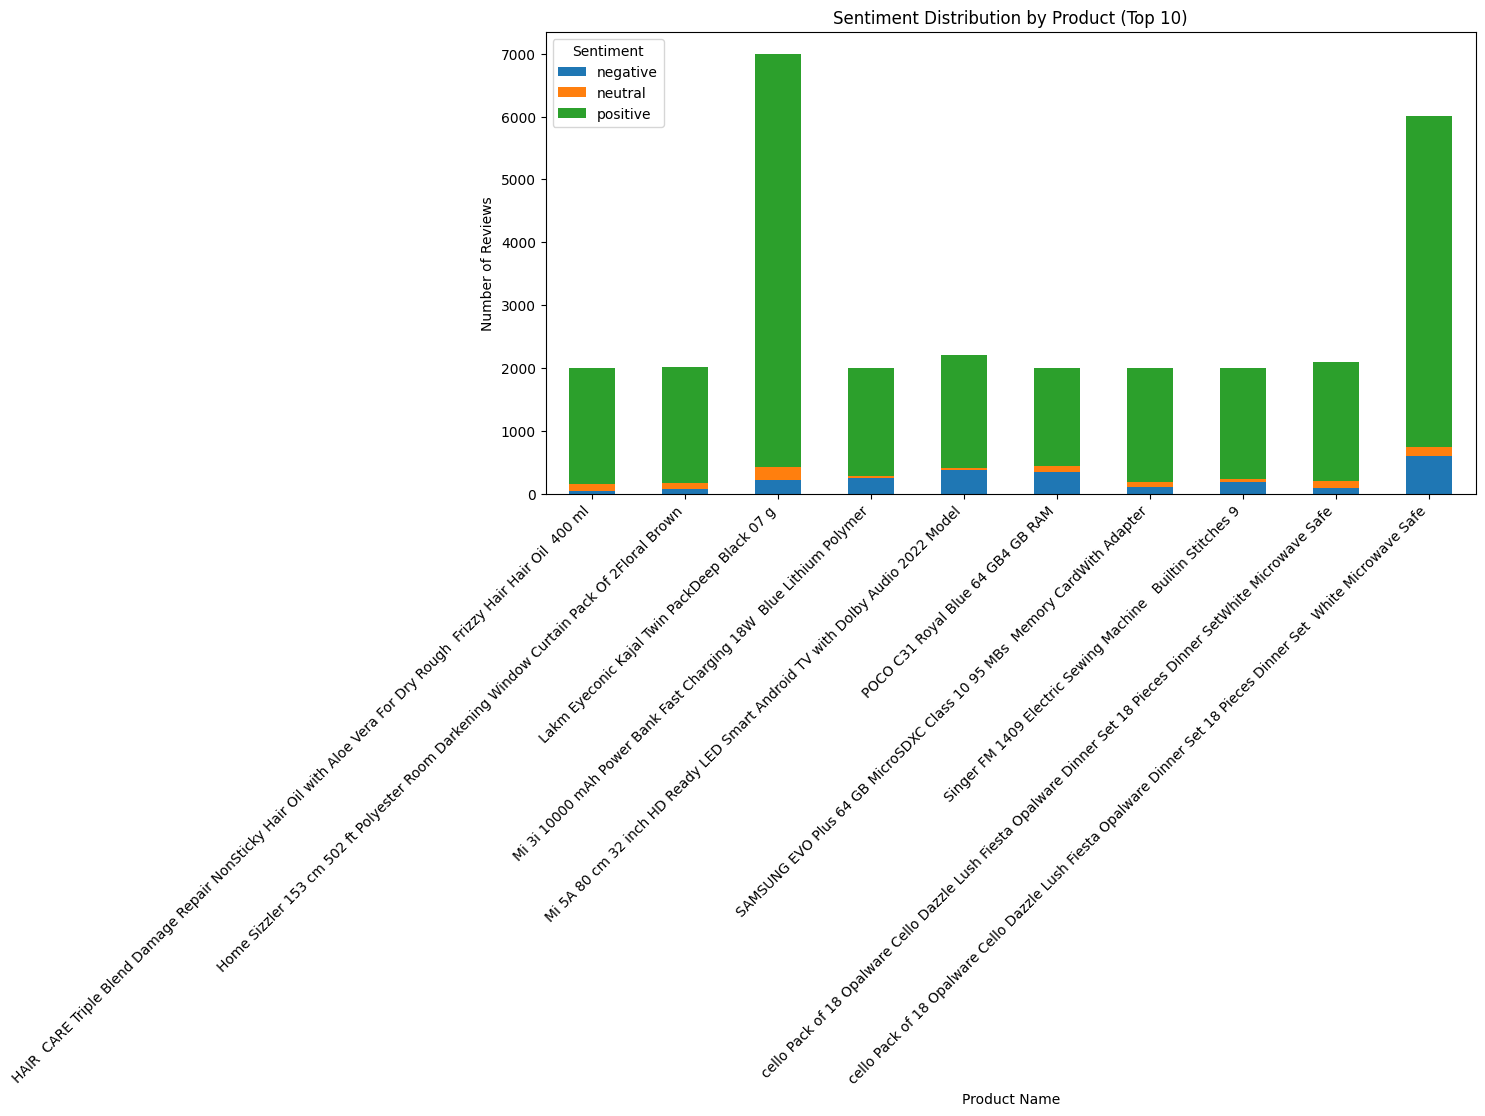

In [145]:
product_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution by Product (Top 10)')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


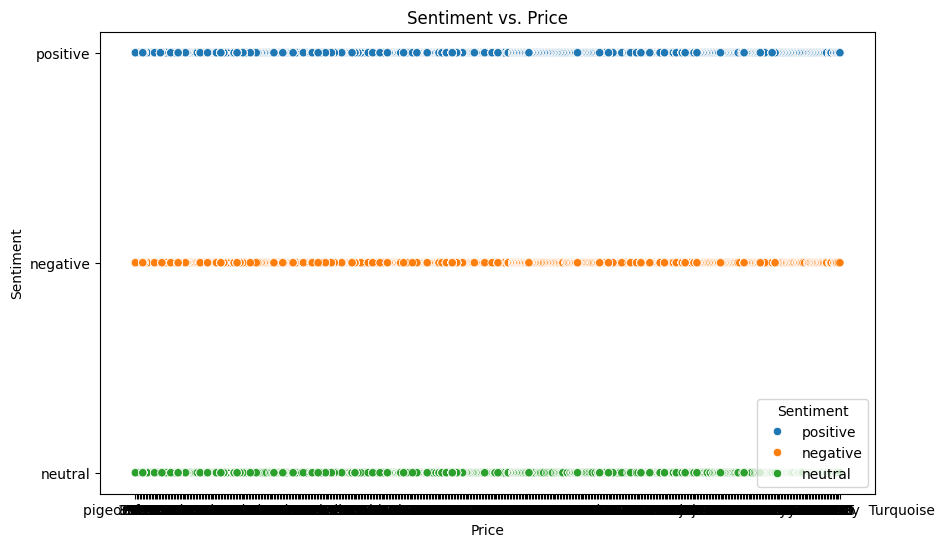

In [146]:
# Sentiment vs. Price (Scatter plot with hue)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_price', y='Sentiment', hue='Sentiment', data=df)
plt.title('Sentiment vs. Price')
plt.xlabel('Price')
plt.ylabel('Sentiment')
plt.show()

